#### PCA on correlated data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import sklearn.linear_model as lm
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
np.random.seed(5)
random_data = np.random.rand(1000)

In [4]:
random_data.shape

(1000,)

In [5]:
random_data[:5]

array([0.22199317, 0.87073231, 0.20671916, 0.91861091, 0.48841119])

In [6]:
# Add 10 columns. 
# x = random_data
# Columns: x,x^2,x^3,....
col_data = {}
for i in range(10):
    col_data[i] = random_data ** (i+1)

In [7]:
df = pd.DataFrame(col_data)

In [8]:
df.shape

(1000, 10)

In [9]:
df.head(7)

,0,1,2,3,4,5,6,7,8,9
0,0.221993,0.049281,0.010940,0.002429,0.000539,0.000120,0.000027,0.000006,1.309352e-06,2.906673e-07
1,0.870732,0.758175,0.660167,0.574829,0.500522,0.435821,0.379483,0.330428,2.877146e-01,2.505224e-01
2,0.206719,0.042733,0.008834,0.001826,0.000377,0.000078,0.000016,0.000003,6.893289e-07,1.424975e-07
3,0.918611,0.843846,0.775166,0.712076,0.654121,0.600883,0.551977,0.507052,4.657838e-01,4.278741e-01
4,0.488411,0.238545,0.116508,0.056904,0.027793,0.013574,0.006630,0.003238,1.581505e-03,7.724245e-04
5,0.611744,0.374231,0.228933,0.140049,0.085674,0.052410,0.032062,0.019614,1.199849e-02,7.340003e-03
6,0.765908,0.586615,0.449293,0.344117,0.263562,0.201864,0.154609,0.118416,9.069612e-02,6.946487e-02


In [10]:
df.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.967403,0.914701,0.863443,0.817456,0.776927,0.741253,0.709724,0.681698,0.656628
1,0.967403,1.000000,0.985779,0.957659,0.925905,0.894231,0.864033,0.835791,0.809595,0.785369
2,0.914701,0.985779,1.000000,0.992037,0.974611,0.953225,0.930489,0.907696,0.885491,0.864182
3,0.863443,0.957659,0.992037,1.000000,0.994907,0.983063,0.967742,0.950742,0.933090,0.915371
4,0.817456,0.925905,0.974611,0.994907,1.000000,0.996465,0.987905,0.976420,0.963278,0.949263
5,0.776927,0.894231,0.953225,0.983063,0.996465,1.000000,0.997407,0.990944,0.982032,0.971587
6,0.741253,0.864033,0.930489,0.967742,0.987905,0.997407,1.000000,0.998019,0.992973,0.985863
7,0.709724,0.835791,0.907696,0.950742,0.976420,0.990944,0.998019,1.000000,0.998439,0.994391
8,0.681698,0.809595,0.885491,0.933090,0.963278,0.982032,0.992973,0.998439,1.000000,0.998738
9,0.656628,0.785369,0.864182,0.915371,0.949263,0.971587,0.985863,0.994391,0.998738,1.000000


* Normalizing the data before running the PCA algorithm


* Standard scaler finds the mean and standard deviation for the input features

In [11]:
scaler = StandardScaler()

In [12]:
def transform_data(scaler, df, columns):
    transformed_data = scaler.transform(df[columns])
    df_transformed = pd.DataFrame(transformed_data, columns=columns)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]

In [13]:
scaler.fit(df)

StandardScaler()

In [14]:
transform_data(scaler, df, df.columns)

In [15]:
df.head(7)

,0,1,2,3,4,5,6,7,8,9
0,-0.958108,-0.949885,-0.839305,-0.735652,-0.655068,-0.593751,-0.546153,-0.508156,-0.477025,-0.450954
1,1.311307,1.469406,1.503857,1.471755,1.401414,1.309325,1.205847,1.097718,0.989370,0.883701
2,-1.011539,-0.972232,-0.846907,-0.737975,-0.655733,-0.593933,-0.546201,-0.508169,-0.477028,-0.450955
3,1.478796,1.761782,1.918906,2.001035,2.033181,2.030290,2.002274,1.956122,1.896939,1.828540
4,-0.026126,-0.303969,-0.458293,-0.525573,-0.542972,-0.534983,-0.515665,-0.492448,-0.468971,-0.446841
5,0.405316,0.159093,-0.052533,-0.204934,-0.304901,-0.365353,-0.398242,-0.412862,-0.415879,-0.411852
6,0.944611,0.883912,0.742779,0.582036,0.426772,0.287438,0.167576,0.067327,-0.014779,-0.080882


In [16]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-4.218847e-17,1.085798e-16,-4.451994e-17,5.473400e-17,-6.472600e-17,1.104672e-17,-2.564615e-17,2.323142e-17,-1.038059e-16,-5.273559e-19
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.733343e+00,-1.118069e+00,-8.787890e-01,-7.450172e-01,-6.572860e-01,-5.942734e-01,-5.462753e-01,-5.081849e-01,-4.770318e-01,-4.509557e-01
25%,-8.552905e-01,-9.024021e-01,-8.214537e-01,-7.296166e-01,-6.531568e-01,-5.931711e-01,-5.459824e-01,-5.081074e-01,-4.770114e-01,-4.509504e-01
50%,5.280867e-03,-2.737635e-01,-4.346742e-01,-5.089861e-01,-5.320717e-01,-5.281357e-01,-5.115016e-01,-4.899787e-01,-4.675353e-01,-4.460184e-01
75%,8.810271e-01,7.900187e-01,6.300497e-01,4.604780e-01,3.041021e-01,1.691093e-01,5.710709e-02,-3.327769e-02,-1.046369e-01,-1.598963e-01
max,1.758319e+00,2.284577e+00,2.714319e+00,3.088541e+00,3.425385e+00,3.734820e+00,4.023095e+00,4.294470e+00,4.552012e+00,4.797991e+00


* Adding all of the features and creating a target variable 'y'

In [17]:
y = df.sum(axis=1)

In [18]:
y.head()

0    -6.714056
1    12.643700
2    -6.800672
3    18.907866
4    -4.315840
dtype: float64

In [19]:
df_pca = df.copy()

* Training 2 linear regression models

    
    * One with target variable y and original features 
    
    * One with target variable y and pca components
    

* N_components parameter is the percentage of variance the model should capture

In [20]:
pca = PCA(n_components=0.9)

In [21]:
pca.fit(df_pca)

PCA(n_components=0.9)

* How many components the pca algorithm came up with

In [22]:
pca.n_components_

1

In [23]:
def transform_with_pca(pca, df, columns):
    transformed_data = pca.transform(df[columns])
    
    tcols = []
    for i in range(pca.n_components_):       
        tcols.append('component_' + str(i))
    
    print ('components:',tcols)
    df_transformed = pd.DataFrame(transformed_data, columns=tcols)
    
    for col in df_transformed.columns:
        df[col] = df_transformed[col]
    
    df.drop(columns, inplace=True, axis=1)
    
    return tcols

In [24]:
transform_with_pca(pca,df_pca,df_pca.columns)

components: ['component_0']


['component_0']

In [25]:
df_pca.head(7)

,component_0
0,-2.106623
1,3.995878
2,-2.131754
3,5.996119
4,-1.384941
5,-0.663719
6,1.240884


* Comparing X and y


* Comparison of first component and y

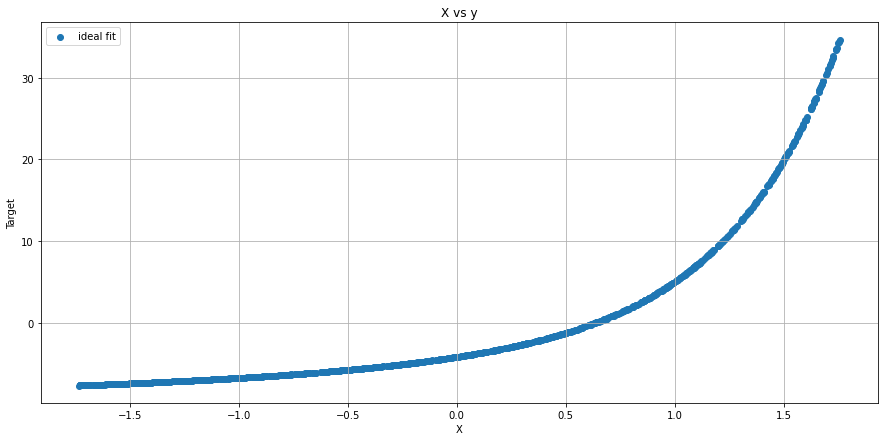

In [30]:
plt.figure(figsize =  (15,7))
plt.scatter(x=df[0],y=y,label='ideal fit')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Target')
plt.title('X vs y')
plt.legend()

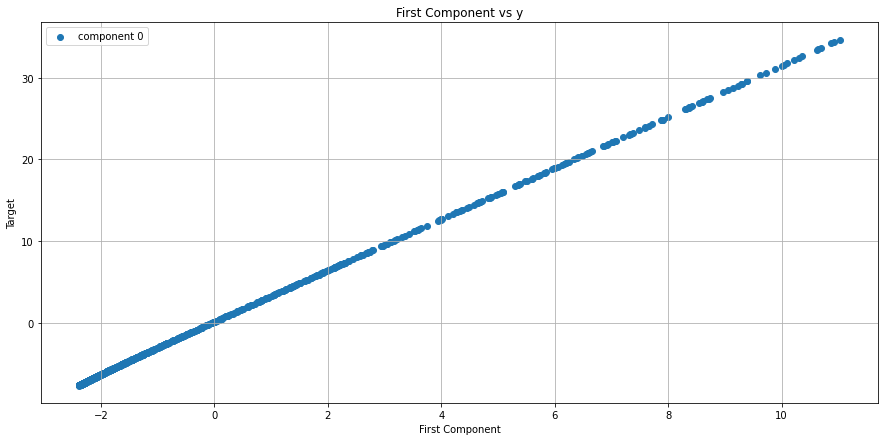

In [31]:
plt.figure(figsize =  (15,7))
plt.scatter(x=df_pca['component_0'],y=y,label='component 0')
plt.grid(True)
plt.xlabel('First Component')
plt.ylabel('Target')
plt.title('First Component vs y')
plt.legend()

* Training using linear regresson model on the actual data

In [32]:
regressor = lm.LinearRegression()
regressor.fit(df,y)

LinearRegression()

In [33]:
y_predicted = regressor.predict(df)

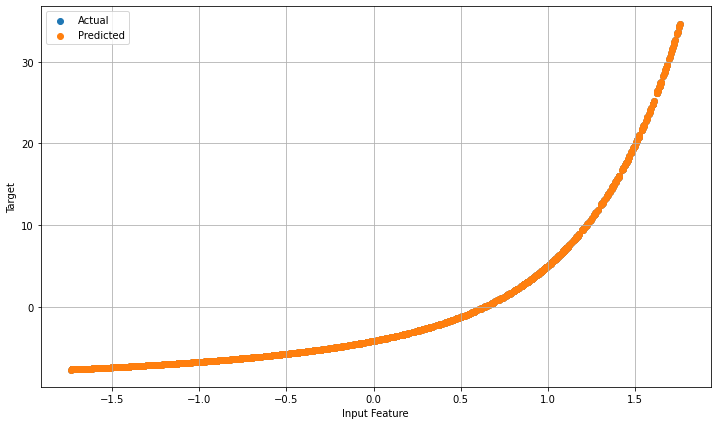

In [34]:
plt.figure(figsize =  (12,7))
plt.scatter(x=df[0],y=y,label='Actual')
plt.scatter(x=df[0],y=y_predicted,label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()

In [35]:
print("RMSE: {0}".format(metrics.mean_squared_error(y,y_predicted)**.5))

RMSE: 3.9736893281800145e-15


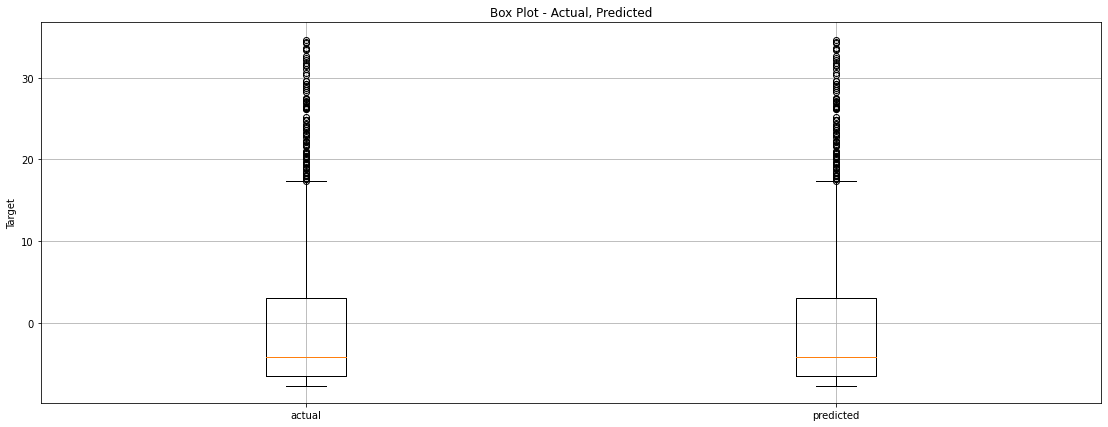

In [38]:
plt.figure(figsize =  (19,7))
plt.boxplot([y,y_predicted], labels=['actual','predicted'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target')
plt.grid(True)

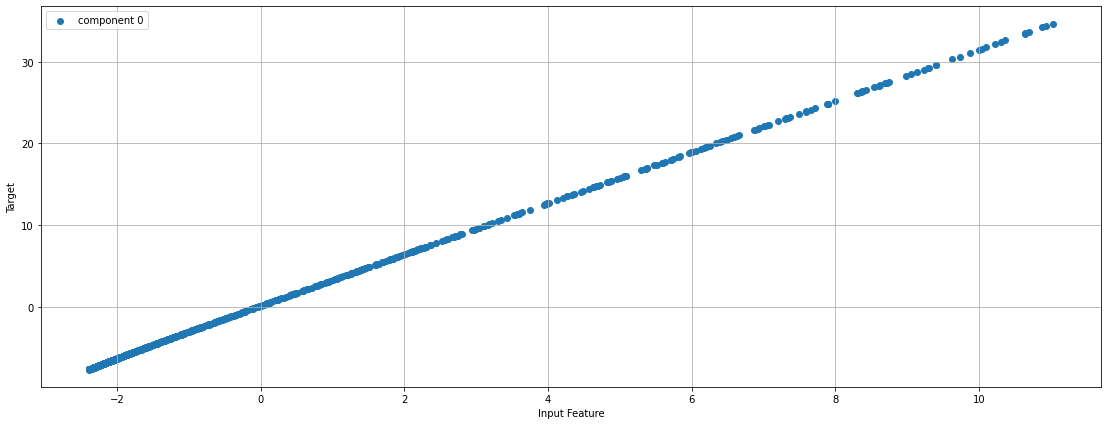

In [40]:
plt.figure(figsize =  (19,7))
plt.scatter(x=df_pca['component_0'],y=y,label='component 0')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()

In [41]:
regressor.fit(df_pca,y)

LinearRegression()

In [42]:
y_predicted_pca = regressor.predict(df_pca)

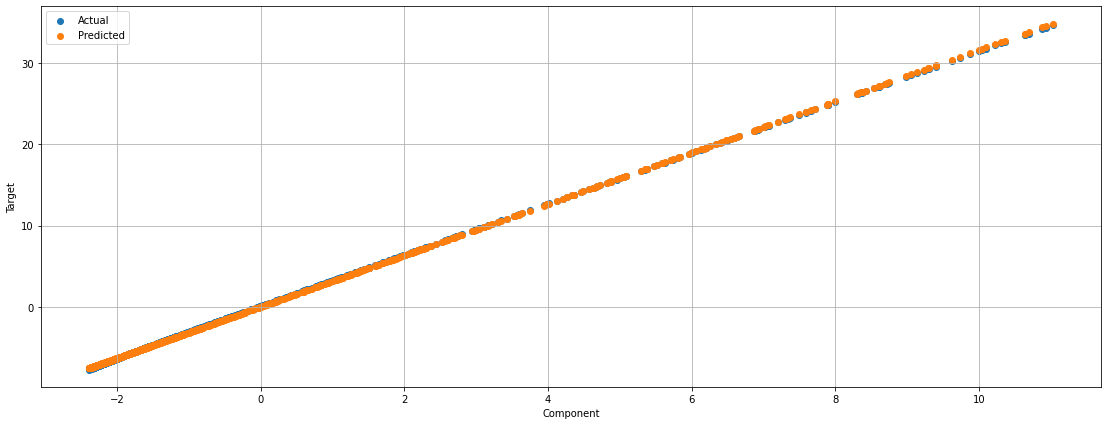

In [44]:
plt.figure(figsize =  (19,7))
plt.scatter(x=df_pca['component_0'],y=y,label='Actual')
plt.scatter(x=df_pca['component_0'],y=y_predicted_pca,label='Predicted')
plt.grid(True)
plt.xlabel('Component')
plt.ylabel('Target')
plt.legend()

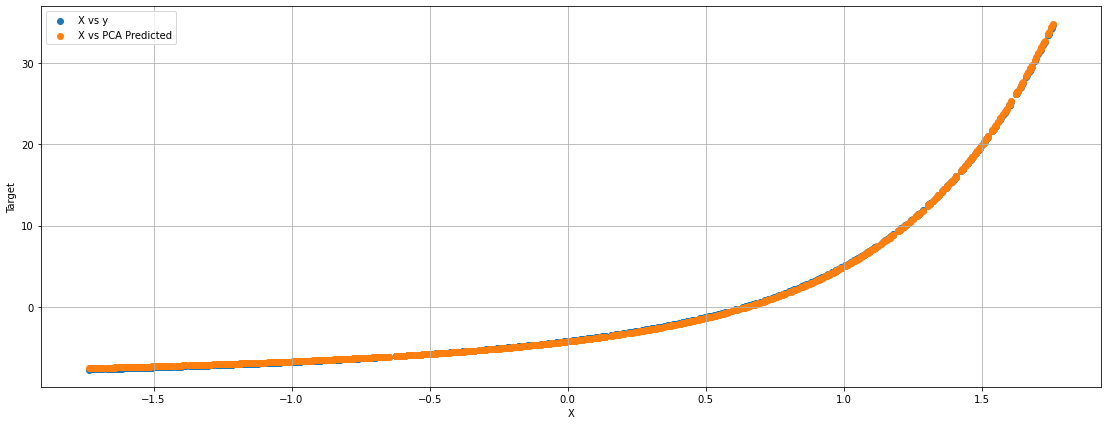

In [45]:
plt.figure(figsize =  (19,7))
plt.scatter(x=df[0],y=y_predicted,label='X vs y')
plt.scatter(x=df[0],y=y_predicted_pca,label='X vs PCA Predicted')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Target')
plt.legend()